# Assignment 3
***
### IDEA
Customer has a longer trip duration than subscriber in average.

### NULL HYPOTHESIS
The mean of trip duration by customer is less than or the same as the one by subscriber.
Choose confidence interval to be at $\alpha = 0.05 $, which means I want the probability of getting a result at least as significant as mine to be less then 5%.

### Reading data from citibike csv file from Jan 2015

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')   # Comment this line if ggplot is not set up in the environment
from scipy import stats
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
df = pd.read_csv('201401-citibike-tripdata.csv')

### Separating subscriber from customer for data description and testing

In [28]:
df['Dura_Subs'] = df['tripduration'][df['usertype']=='Subscriber']
df['Dura_Cust'] = df['tripduration'][df['usertype']=='Customer']

### Plot the histogram to see the distribution of trip duration among the two groups (subscriber and customer), outliers (≥3 standard deviations) are removed for the plotting.

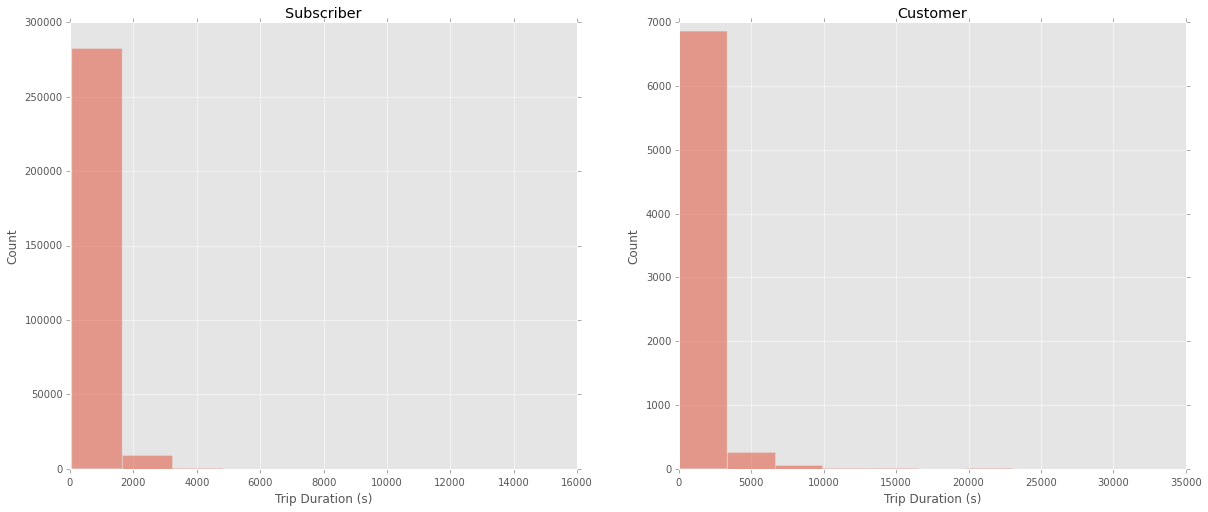

In [29]:
plt.figure(1, figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = df[np.abs(df.Dura_Subs - df.Dura_Subs.mean()) <=
         (3 * df.Dura_Subs.std())].Dura_Subs.plot(kind='hist', alpha=0.5)
ax1.set_title('Subscriber')
ax1.set_ylabel('Count')
ax1.set_xlabel('Trip Duration (s)')
ax2 = plt.subplot(1, 2, 2)
ax2 = df[np.abs(df.Dura_Cust - df.Dura_Cust.mean()) <=
         (3 * df.Dura_Cust.std())].Dura_Cust.plot(kind='hist', alpha=0.5)
ax2.set_title('Customer')
ax2.set_ylabel('Count')
ax2.set_xlabel('Trip Duration (s)')

### Now I describe the data of the two groups. Counts, mean, standard deviation and quantiles are shown as the following. It is obvious from the sample data that the mean value of trip duration by customer is signigicantly more than the one by subscriber.

In [30]:
print 'Summary Statistics for Tripduration of Subscriber'
print df.Dura_Subs.describe()
print 'Summary Statistics for Tripduration of Customer'
print df.Dura_Cust.describe()

Summary Statistics for Tripduration of Subscriber
count     293146.000000
mean         709.221814
std         5074.253975
min           60.000000
25%          338.000000
50%          506.000000
75%          772.000000
max      1990440.000000
Name: Dura_Subs, dtype: float64
Summary Statistics for Tripduration of Customer
count      7254.000000
mean       1734.040943
std       10451.277548
min          60.000000
25%         643.000000
50%        1070.000000
75%        1589.000000
max      693547.000000
Name: Dura_Cust, dtype: float64


### Since the distribution of the two samples looks highly skewed by the plot, I also want to calculate the skewness and kurtosis of them. They turned to be pretty high.

In [31]:
stats.describe(df.Dura_Subs.dropna())

DescribeResult(nobs=293146, minmax=(60.0, 1990440.0), mean=709.22181438600558, variance=25748053.400456231, skewness=242.84032041951644, kurtosis=84815.36684335196)

In [32]:
stats.describe(df.Dura_Cust.dropna())

DescribeResult(nobs=7254, minmax=(60.0, 693547.0), mean=1734.0409429280396, variance=109229202.39388388, skewness=48.62171471106821, kurtosis=2889.0422962423054)

### Plot the mean values of the two groups.

[<matplotlib.text.Text at 0x1157af250>, <matplotlib.text.Text at 0x1157ec8d0>]

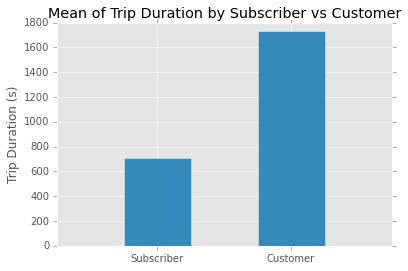

In [33]:
plt.figure(2)
ax3 = plt.subplot(1,1,1)
ax3.bar([2,6], [df.Dura_Subs.mean(), df.Dura_Cust.mean()], [2,2])
ax3.set_xlim(0,10)
ax3.set_title('Mean of Trip Duration by Subscriber vs Customer')
ax3.set_ylabel('Trip Duration (s)')
ax3.set_xticks([3,7])
ax3.set_xticklabels(('Subscriber','Customer'))

### Since we are comparing the mean value of the two groups and we do not have the values for the population variaces, I hereby perform a two sample t-test using scipy.stats and assume the population does not have identical variances.

In [34]:
stats.ttest_ind(df.Dura_Cust.dropna(), df.Dura_Subs.dropna(), equal_var = False)

(8.3272893686732505, 9.7794474156679321e-17)

### The one-tailed p value is actually 1/2 of the calculated value and it is below the confidence level of 0.05. (a.k.a $p/2<\alpha$ & $t>0$) Therefore, we can reject the null hypothesis and conclude that this study did provide statistical eveidence that the trip duration of customer is longer than the one of subscriber.
### However, one must noticed that since the the skewness and kurtosis of the two samples are far beyond the acceptable levels of the normal distribution which violates the assumption that the populations from which the samples have been drawn should be normal, the conclusion we just derived from the t-test may not hold. 
### Hence, we recommend to do more nonparametric test in the future analysis.